###  전국 시도별 화재 발생 현황
- 전국 2010-2021년까지 시도별 화재 발생 건수
- 전국 평균과 시도별 비교 전국 평균을 line으로 그리고 시도별 평균으로 막대그래프
- 재산 피해액의 동산, 부동산 비율 pie

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

font_path = "C:\Windows\Fonts\HMKMRHD.TTF"
kfont = matplotlib.font_manager.FontProperties(fname=font_path).get_name()

matplotlib.rcParams['font.family'] = [kfont]

In [79]:
pd_data = pd.read_csv('시도별_화재발생_현황_총괄__2010-2021.csv', encoding='cp949')
filter1 = pd_data['행정구역별'] != '전국'
pd_data_f = pd_data[filter1]

filter2 = pd_data_f['사망 (명)']=='-'
pd_data_f.loc[filter2,'사망 (명)'] = '0'
# pd_data_f['사망 (명)'].astype(np.int64)
# pd_data_f.dtypes

행정구역별           object
시점               int64
건수 (건)           int64
사망 (명)          object
부상 (명)           int64
재산피해(계) (천원)     int64
부동산 (천원)         int64
동산 (천원)          int64
이재가구수 (가구)       int64
이재민수 (명)         int64
dtype: object

In [13]:
print(pd_data.shape)
print(pd_data.dtypes)

# for i,e in enumerate(pd_data['행정구역별']):
#     print(i,e)

(214, 10)
행정구역별           object
시점               int64
건수 (건)           int64
사망 (명)          object
부상 (명)           int64
재산피해(계) (천원)     int64
부동산 (천원)         int64
동산 (천원)          int64
이재가구수 (가구)       int64
이재민수 (명)         int64
dtype: object


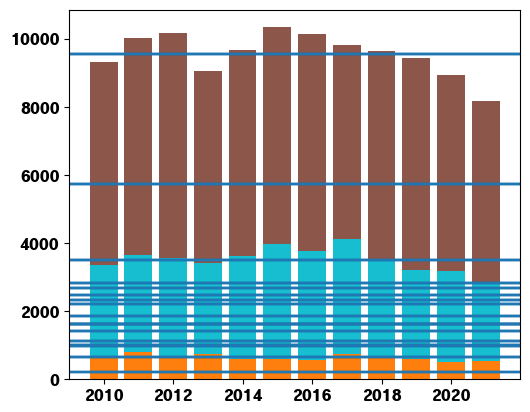

In [9]:
fig = plt.figure(figsize=(6.4*2,4.8))
line_axe = fig.add_subplot(1,2,1)
col_names = pd_data_f.columns
# bar_axe = fig.add_subplot(2,2,2)
# pie_axe = fig.add_subplot(2,2,4)

# x=[]
for i, e in enumerate(pd_data_f['행정구역별']):
    filter1 = pd_data['행정구역별'] == e
    y_mean = pd_data_f.loc[filter1, '건수 (건)'].mean()
    ys = pd_data_f.loc[filter1, '건수 (건)']
    xs = pd_data_f.loc[filter1, '시점']
    line_axe.axhline(y_mean)
    line_axe.bar(xs,ys)

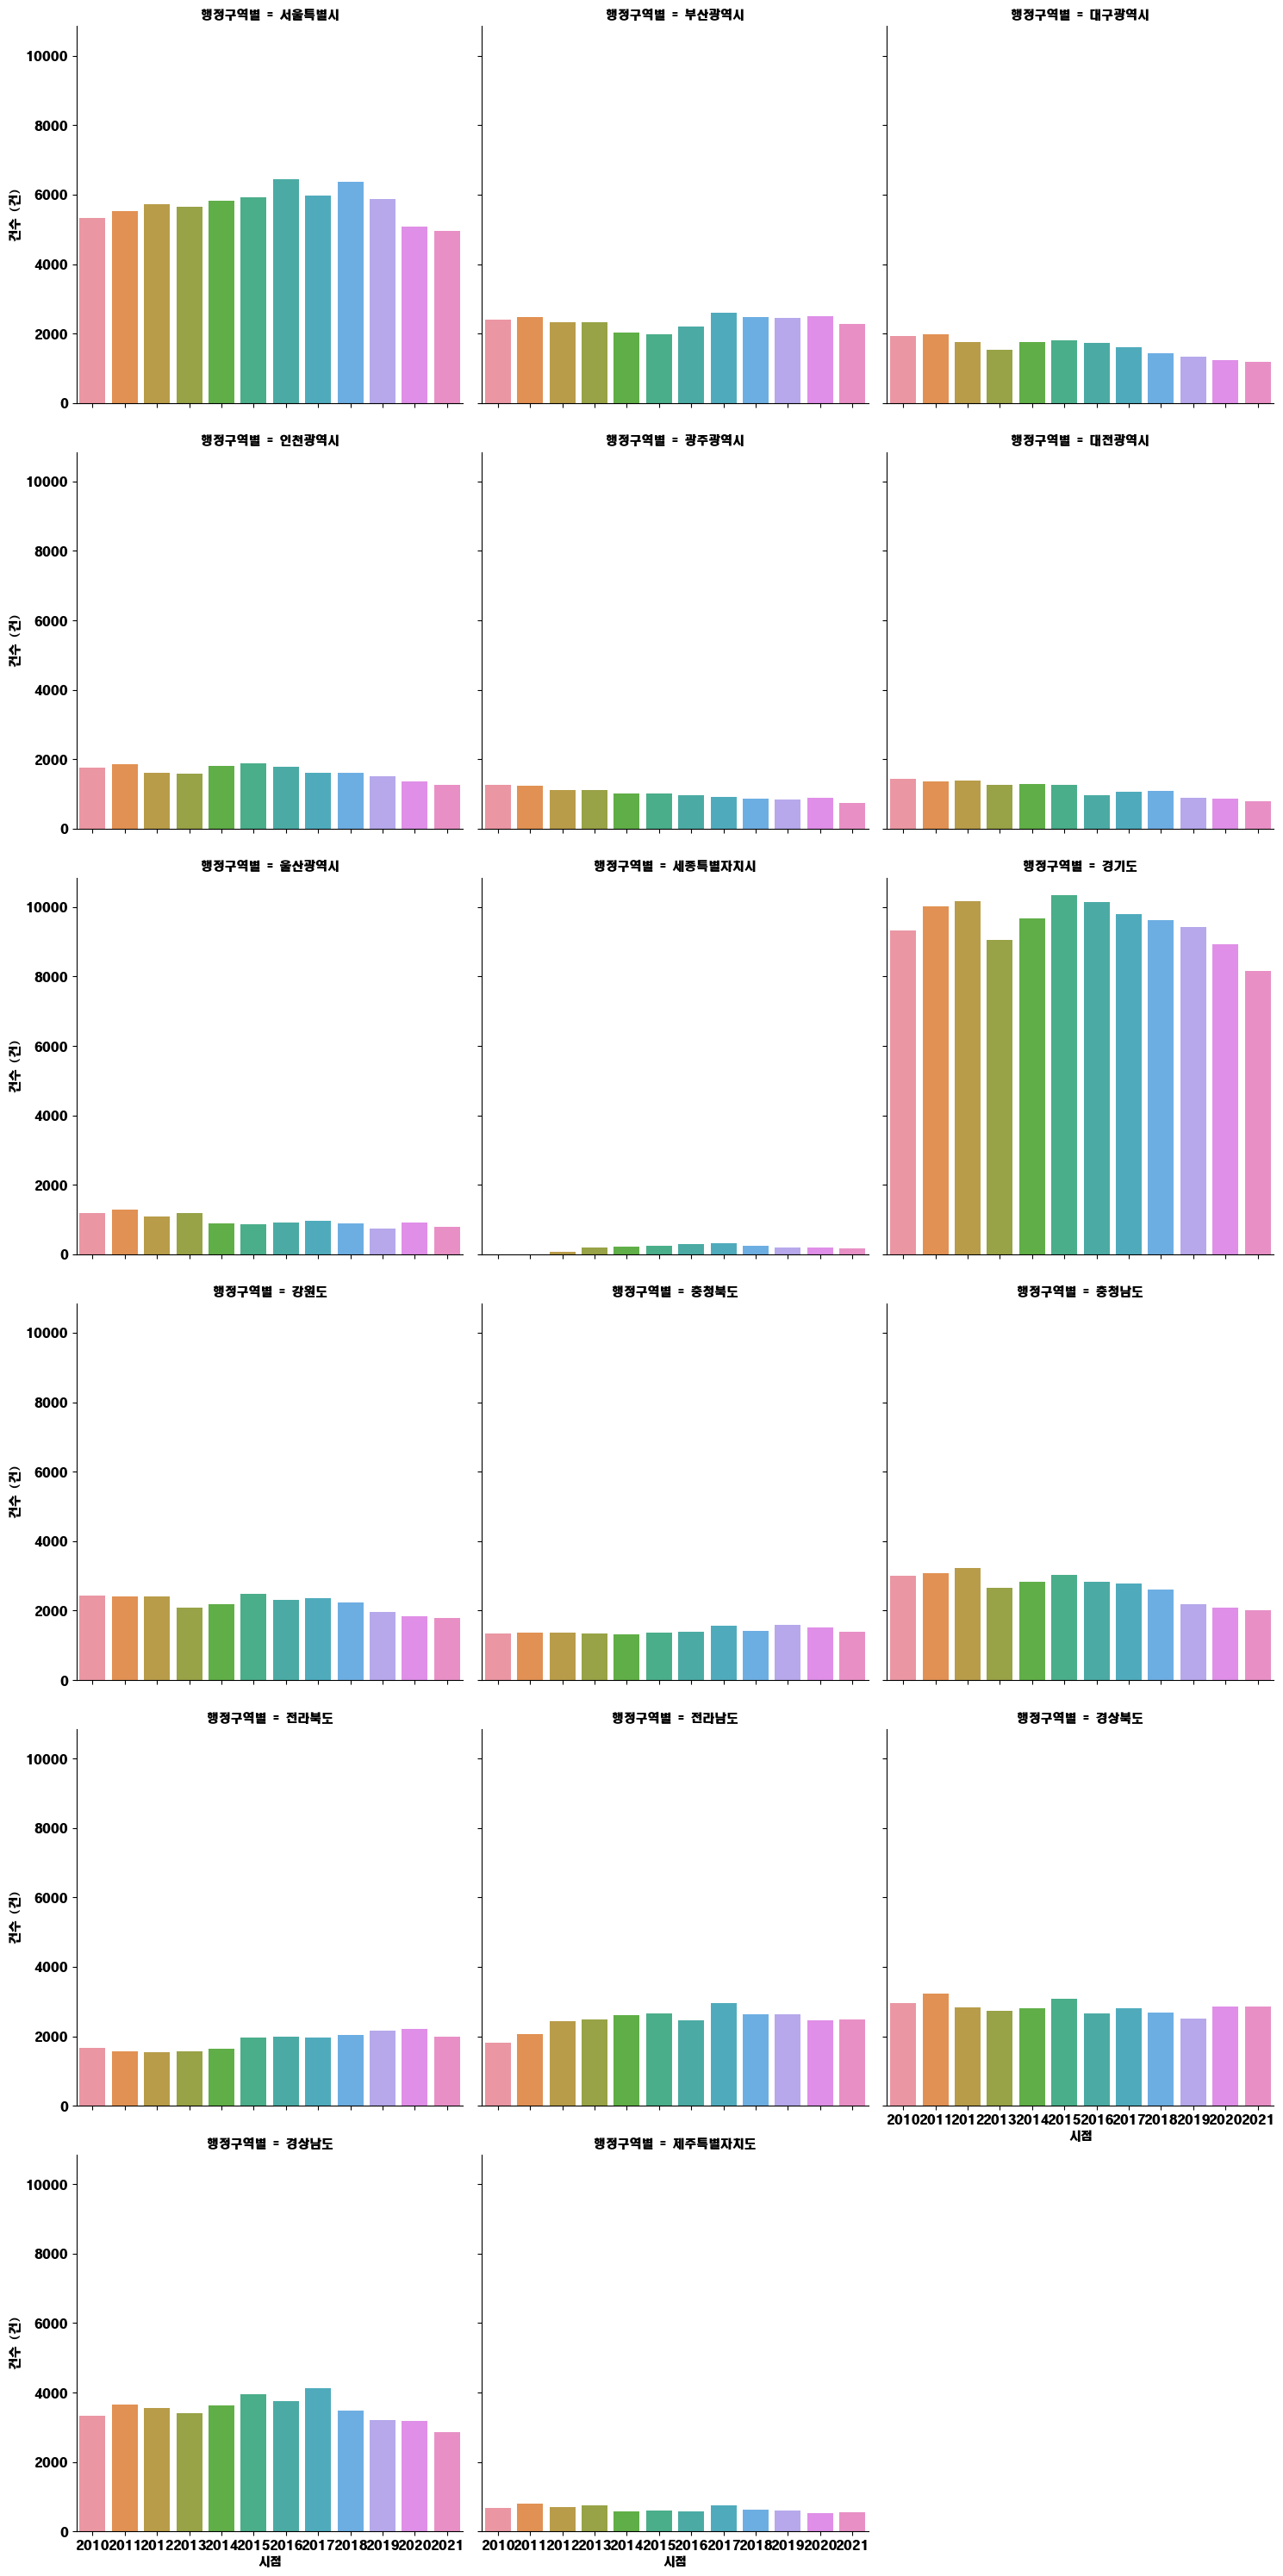

In [17]:
sns.catplot(data = pd_data_f, x='시점', y='건수 (건)', kind='bar', col='행정구역별', col_wrap=3)

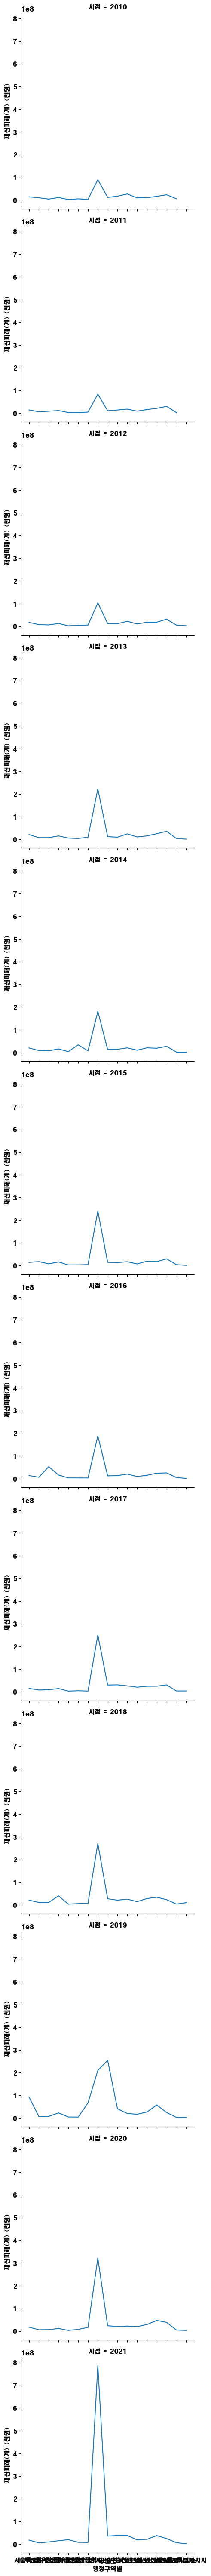

In [26]:
sns.relplot(data=pd_data_f, x='행정구역별', y='재산피해(계) (천원)',kind='line', col='시점',col_wrap=1)

In [27]:
filter1 = pd_data['사망 (명)'] =='-'
pd_data_f.loc[filter1,'사망 (명)']=0 
pd_data_f = pd_data_f[filter1]
pd_data_f['사망 (명)'] = pd_data_f.loc[:,'사망 (명)'].astype(np.int64)
pd_data_f

C:\Users\ITPS\AppData\Local\Temp\ipykernel_7152\698671963.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pd_data_f = pd_data_f[filter1]


,행정구역별,시점,건수 (건),사망 (명),부상 (명),재산피해(계) (천원),부동산 (천원),동산 (천원),이재가구수 (가구),이재민수 (명)
105,세종특별자치시,2021,185,0,15,2085194,940781,1144413,5,9
